In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('bmw1.csv', sep=',')
df

,model,year,price,type,distance,fuel,tax,miles per galoon,size
0,4,2014,11200.000000,0,67068.0,0,125.000000,57.6,2.0
1,11,2017,18500.000000,2,12160.0,0,145.000000,65.7,2.0
2,2,2017,18300.000000,2,20000.0,0,150.000000,62.8,2.0
3,0,2019,29398.000000,2,9983.0,3,145.000000,39.8,3.0
4,2,2018,22998.000000,2,16360.0,0,145.000000,57.7,2.0
...,...,...,...,...,...,...,...,...,...
842,0,2017,13500.000000,1,16423.0,0,150.000000,72.4,1.5
843,0,2016,8800.000000,1,51002.0,0,0.000000,83.1,1.5
844,0,2015,16314.000000,1,17846.0,3,295.328415,35.3,3.0
845,4,2014,15495.000000,2,51565.0,0,160.000000,51.4,2.0


In [3]:
X = df.iloc[:, [True,True,False,True,True,True,True,True,True]]
y = df['price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X

,model,year,type,distance,fuel,tax,miles per galoon,size
0,4,2014,0,67068.0,0,125.000000,57.6,2.0
1,11,2017,2,12160.0,0,145.000000,65.7,2.0
2,2,2017,2,20000.0,0,150.000000,62.8,2.0
3,0,2019,2,9983.0,3,145.000000,39.8,3.0
4,2,2018,2,16360.0,0,145.000000,57.7,2.0
...,...,...,...,...,...,...,...,...
842,0,2017,1,16423.0,0,150.000000,72.4,1.5
843,0,2016,1,51002.0,0,0.000000,83.1,1.5
844,0,2015,1,17846.0,3,295.328415,35.3,3.0
845,4,2014,2,51565.0,0,160.000000,51.4,2.0


In [4]:
f1 = ['year']

from sklearn.linear_model import LinearRegression
sr = LinearRegression().fit(X_train[f1], y_train)

sr.coef_, sr.intercept_

(array([3475.27760003]), -6988744.81979279)

Линейная регрессия имеет вид Цена = 3475.27760003*Год-6988744.81979279

In [5]:
y_pred = sr.predict(X_test[f1])
sr.score(X_train[f1], y_train).round(3), sr.score(X_test[f1], y_test).round(3)

(0.428, 0.361)

In [6]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, sr.predict(X_train[f1]), squared=False).round(2), mean_squared_error(y_test, y_pred, squared=False).round(2)

(6783.8, 7378.87)

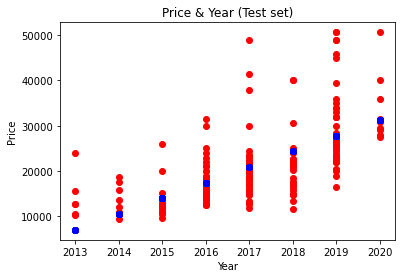

In [7]:
plt.scatter(X_test['year'], y_test, color = 'red')
plt.plot(X_test['year'], sr.predict(X_test[f1]), 'bo')
plt.title('Price & Year (Test set)')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

График показал, чем моложе автомобиль, тем выше его цена

In [8]:
mr = LinearRegression().fit(X_train, y_train)
mr.score(X_train, y_train).round(3)

0.801

Коэффициент регрессии = 0.801

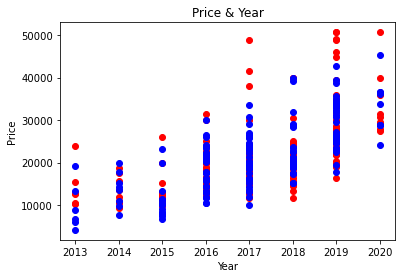

In [9]:
# Visualising the Test set results
plt.scatter(X_test['year'], y_test, color = 'red')
plt.plot(X_test['year'], mr.predict(X_test), 'bo')
plt.title('Price & Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

In [10]:
# Checking p-values
import statsmodels.api as sm
X1 = sm.add_constant(X_train)
mr1 = sm.OLS(y_train, X1).fit()
#mr1.pvalues
mr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     337.0
Date:                Tue, 28 Dec 2021   Prob (F-statistic):          1.05e-228
Time:                        01:53:10   Log-Likelihood:                -6575.2
No. Observations:                 677   AIC:                         1.317e+04
Df Residuals:                     668   BIC:                         1.321e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -5.01e+06   2.77e+05    -18.114      0.000   -5.55e+06   -4.47e+06
model              617.4266     36.680     16.833      0.000     545.404     689.449
year              2490.0296    136.981     18.178      0.000    2221.065    2758.994
type               966.2640    223.609      4.321      0.000     527.202    1405.326
distance            -0.1027      0.012     -8.546      0.000      -0.126      -0.079
fuel              -173.3647    154.916     -1.119      0.264    -477.547     130.817
tax                -22.2534      3.807     -5.846      0.000     -29.728     -14.779
miles per galoon   -91.8513     19.773     -4.645      0.000    -130.676     -53.027
size              6864.4488    387.433     17.718      0.000    6103.716    7625.181
==============================================================================
Omnibus:                      148.626   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              466.377
Skew:                           1.043   Prob(JB):                    5.34e-102
Kurtosis:                       6.491   Cond. No.                     5.76e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.76e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
X_train_p = PolynomialFeatures().fit_transform(X_train)
X_test_p = PolynomialFeatures().fit_transform(X_test)

pr = LinearRegression().fit(X_train_p, y_train)

# Getting parameters
pr.coef_, pr.intercept_

(array([ 2.96281166e+07,  4.47055922e+04, -8.67573633e+05, -6.40937494e+05,
         2.72409932e+00,  1.15305608e+06,  9.43182436e+03,  2.25231535e+05,
         4.64736847e+05, -4.05599395e+01, -2.29575359e+01, -5.36611863e+01,
        -8.69012622e-03,  4.87773113e+01,  2.10472794e+00,  2.36303241e+01,
         5.67977004e+02,  2.17389027e+02,  3.16026530e+02, -1.21143101e-03,
        -5.66233981e+02, -4.69357344e+00, -1.11711496e+02, -2.19036603e+02,
         1.73728346e+03,  9.74048208e-03, -1.82651736e+02, -5.33922603e+00,
        -1.21225578e+01,  9.65659175e+02,  9.79620381e-07, -2.60729504e-02,
         2.75344049e-05, -3.82706478e-03, -8.95477106e-02, -4.15770901e+03,
         5.57133360e+00,  2.06758043e+01, -3.60646649e+02,  1.39960391e-01,
         9.49364592e-01, -2.70798108e+01,  2.94000348e+00, -2.66143977e+02,
        -6.58426858e+02]),
 835869850.3358053)

In [12]:
# Predicting the Test set results
y_pred = pr.predict(X_test_p)

# Coefficient of determination R^2
pr.score(X_train_p, y_train).round(3)

0.915

R^2 лучше для множественной линейной регресси.

In [14]:
# Mean squared error
mean_squared_error(y_train, pr.predict(X_train_p), squared=False).round(2), mean_squared_error(y_test, y_pred, squared=False).round(2)

(2622.71, 3325.22)

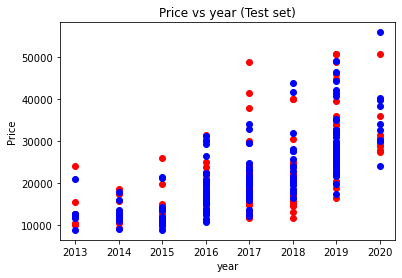

In [15]:
# Visualising the Test set results
plt.scatter(X_test['year'], y_test, color = 'red')
plt.plot(X_test['year'], pr.predict(X_test_p), 'bo')
plt.title('Price vs year (Test set)')
plt.xlabel('year')
plt.ylabel('Price')
plt.show()


In [16]:
import pickle
obj = {'X_train': X_train, 'X_test': X_test,'y_train': y_train,'y_test': y_test}
output = open('bmw2.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()